In [9]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [20]:
training=train_data.flow_from_directory('/content/drive/MyDrive/dataset_FVC2000_DB4_B',target_size=(150,150), batch_size=32, class_mode='categorical')
     

Found 810 images belonging to 1 classes.


In [21]:
training.class_indices

{'dataset': 0}

In [22]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [23]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
26/26 [==============================] - 13s 335ms/step - loss: 47067.9102 - accuracy: 0.0000e+00
Epoch 2/20
26/26 [==============================] - 7s 273ms/step - loss: 2584785.2500 - accuracy: 0.1975
Epoch 3/20
26/26 [==============================] - 6s 220ms/step - loss: 31451186.0000 - accuracy: 0.1580
Epoch 4/20
26/26 [==============================] - 7s 252ms/step - loss: 143517408.0000 - accuracy: 0.1580
Epoch 5/20
26/26 [==============================] - 6s 217ms/step - loss: 362597248.0000 - accuracy: 0.1309
Epoch 6/20
26/26 [==============================] - 6s 217ms/step - loss: 751236608.0000 - accuracy: 0.0790
Epoch 7/20
26/26 [==============================] - 7s 255ms/step - loss: 1269379840.0000 - accuracy: 0.1185
Epoch 8/20
26/26 [==============================] - 6s 227ms/step - loss: 1917511040.0000 - accuracy: 0.1185
Epoch 9/20
26/26 [==============================] - 6s 238ms/step - loss: 2566032384.0000 - accuracy: 0.1185
Epoch 10/20
26/26 [========

In [24]:
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 189454368768.0
Train Accuracy 0.0


In [29]:
model.save("/content/drive/MyDrive/dataset_FVC2000_DB4_B")
model_1=load_model('/content/drive/MyDrive/dataset_FVC2000_DB4_B')

1/1 [==============================] - 0s 21ms/step
có cả tình duyên, sự nghiệp đều tốt


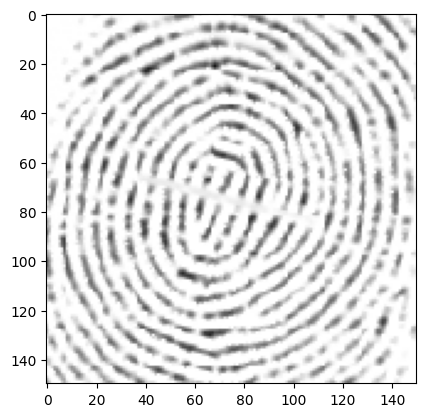

1/1 [==============================] - 0s 23ms/step
có cả tình duyên, sự nghiệp đều tốt


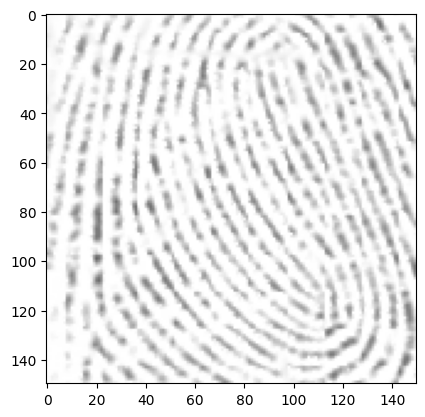

1/1 [==============================] - 0s 24ms/step
có cả tình duyên, sự nghiệp đều tốt


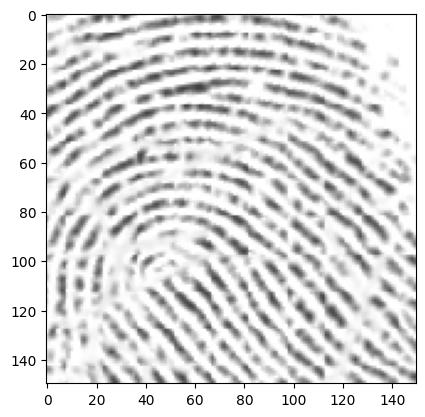

1/1 [==============================] - 0s 20ms/step
có cả tình duyên, sự nghiệp đều tốt


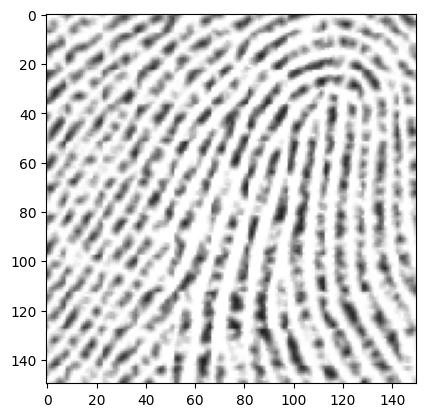

1/1 [==============================] - 0s 19ms/step
có cả tình duyên, sự nghiệp đều tốt


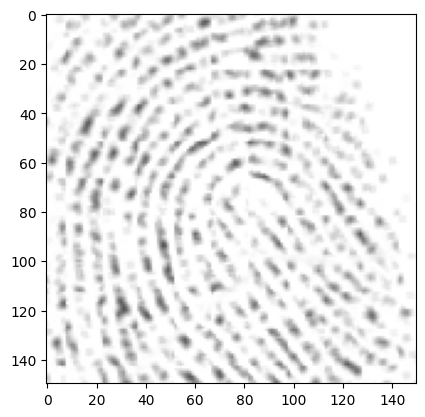

1/1 [==============================] - 0s 28ms/step
có cả tình duyên, sự nghiệp đều tốt


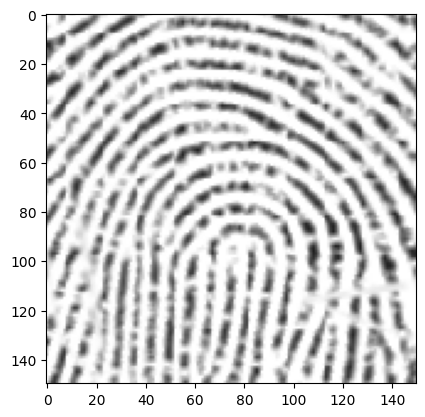

1/1 [==============================] - 0s 21ms/step
có cả tình duyên, sự nghiệp đều tốt


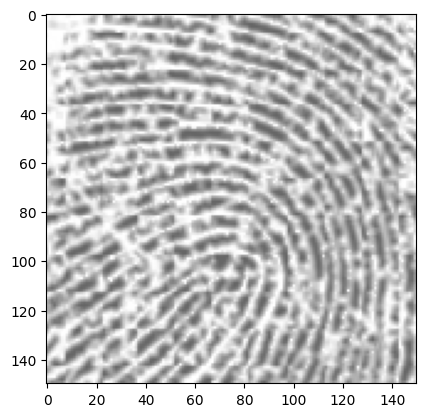

1/1 [==============================] - 0s 27ms/step
có cả tình duyên, sự nghiệp đều tốt


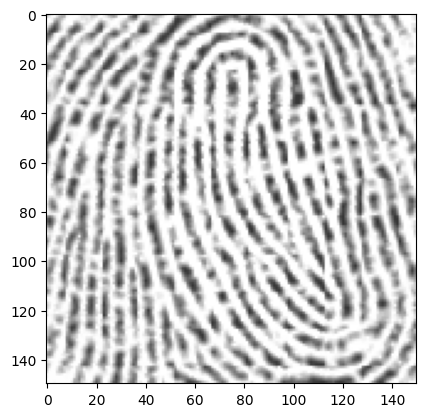

1/1 [==============================] - 0s 27ms/step
có cả tình duyên, sự nghiệp đều tốt


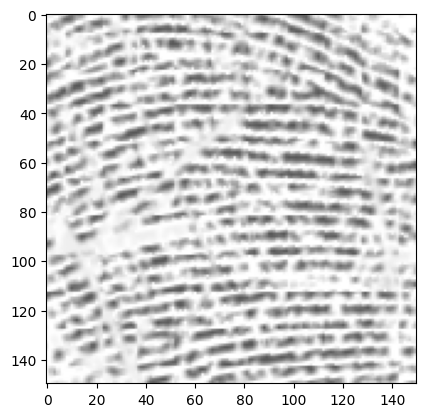

1/1 [==============================] - 0s 35ms/step
có cả tình duyên, sự nghiệp đều tốt


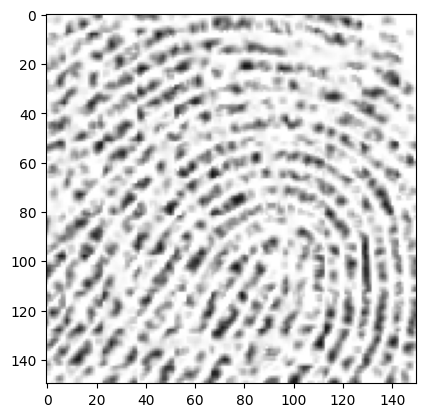

In [36]:

test="/content/drive/MyDrive/dataset_FVC2000_DB4_B/dataset/real_data"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['không có gì tốt cả','có tình duyên tốt','có tình duyên và trí tuệ tốt','có tình duyên, trí tuệ và sinh mệnh tốt',
              'có cả tình duyên, sự nghiệp đều tốt','có trí tuệ và sinh mệnh tốt',
              'có trí tuệ, sinh mệnh và sự nghiệp tốt','có trí tuệ và sự nghiệp tốt','có sự nghiệp tốt','Tình duyên: Người độc thân chớ vội yêu lầm ai, hãy tìm hiểu thật kĩ trước khi quyết định đến với nhau', 
'Tài lộc: Tiền bạc chi tiêu thoải mái, đôi lúc tiêu tiền cho mua sắm online quá đà',
'Sức khỏe: Nhìn màn hình máy tính quá lâu nên thư giãn, nghỉ ngơi cho mắt','Công việc: Hôm nay công việc không tốn quá nhiều sức lực, thường xuyên có nhiều đổi mới, bạn bè giúp đỡ khi khó khăn', 

'Tình duyên: Tình duyên của bạn và người ấy đồng điệu về tâm hồn, thấu hiểu khó khăn của nhau, không cần nói cũng hiểu được đối phương muốn điều gì'
]
  print(class_name[result])
  plt.show()
     